In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
import scipy as sp
import matplotlib.mlab as mlab
from pathlib import Path

In [3]:
date = ['2019-06-10','2019-06-12','2019-06-13']
jointdate = '_'.join(date)
micscp = 'DIC' #TIRF or DIC
paths = []

for i in date :
    p = 'E:\\Sofia\\'+i+'_'+micscp
    path = Path(p)
    paths = paths+[path]
    print(path.exists())

paths

True
True
True


[WindowsPath('E:/Sofia/2019-06-10_DIC'),
 WindowsPath('E:/Sofia/2019-06-12_DIC'),
 WindowsPath('E:/Sofia/2019-06-13_DIC')]

In [4]:
data = pd.read_csv(paths[0]/(date[0]+'_data.csv'),sep=',',index_col=0);
for i in [1,2]:
    df = pd.read_csv(paths[i]/(date[i]+'_data.csv'),sep=',',index_col=0);
    data = data.append(df)
data = data.sort_values(by=['tub conc'])
data.to_csv(path.parents[0]/('joint_means_'+jointdate+'.csv'), encoding='utf-8', index=True)
data

,tub conc,growth mean,growth std,time2nuc mean,time2nuc std,lifetime mean,lifetime std
12,6,0.523967,0.087227,7.631702,10.378604,4.780119,3.833072
23,8,0.397565,0.084652,9.239672,9.429973,3.362478,2.183596
21,8,0.494685,0.087852,9.453540,11.384597,5.447784,3.913956
21,10,0.670870,0.107095,7.578522,9.148305,6.356209,4.675182
14,10,0.676588,0.111727,8.442000,9.166020,7.414010,5.913080
11,10,0.667333,0.114626,8.388042,9.310328,7.039546,6.130686
22,12,0.736737,0.120966,4.719874,5.870622,7.092635,5.855508
25,12,0.905429,0.180300,4.440508,6.970039,7.189651,5.983729
13,14,0.988114,0.186524,2.165439,3.213133,8.161776,6.475254
15,14,1.140612,0.208466,2.626075,4.438078,10.461388,7.595772


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: Matplotlib

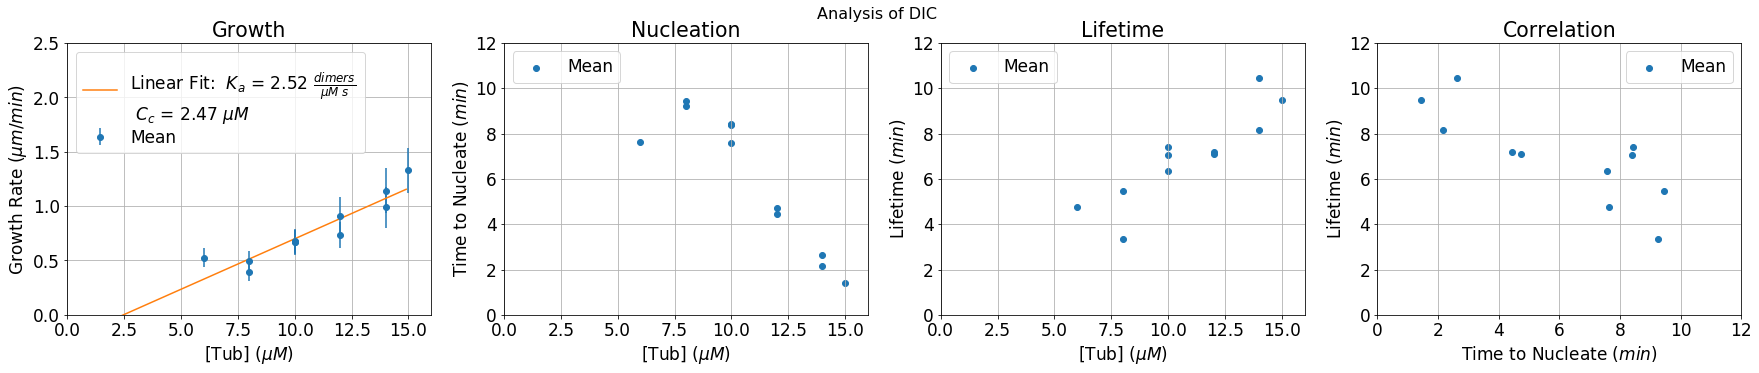

In [38]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 17}
plt.rc('font', **font)

titles = ('Growth','Nucleation','Lifetime','Correlation')
ylables = ('Growth Rate ' r'$(\mu m / min)$','Time to Nucleate ' r'$(min)$','Lifetime ' r'$(min)$','Lifetime ' r'$(min)$')

a1 , a0 = np.polyfit(data['tub conc'], data['growth mean'], 1)
y_int = -a0/a1
x_range = np.arange(0,15,0.1)

plt.figure(figsize=(30,5))
plt.suptitle('Analysis of '+micscp, fontsize=16)
 
plt.subplot(1,4,1)
plt.errorbar(data['tub conc'], data['growth mean'], yerr=data['growth std'], fmt='o')
plt.plot(x_range, a1*x_range+a0)
plt.ylim(0,2.5)
plt.legend(('Linear Fit:  'r'$K_a$'' = %.2f 'r'$\frac{dimers}{\mu M \; s}$'' \n 'r'$C_c$'' = %.2f 'r'$\mu M$' %(a1*27.1, y_int),'Mean'),loc='upper left')

plt.subplot(1,4,2)
plt.scatter(data['tub conc'], data['time2nuc mean'])
#plt.scatter(data['tub conc'], data['time2nuc std'])
plt.ylim(0,12)
plt.legend(( 'Mean',r'$\sigma$'),loc='upper left')

plt.subplot(1,4,3)
plt.scatter(data['tub conc'], data['lifetime mean'])
#plt.scatter(data['tub conc'], data['lifetime std'])
plt.ylim(0,12)
plt.legend(('Mean', r'$\sigma$'),loc='upper left')

plt.subplot(1,4,4)
plt.scatter(data['time2nuc mean'], data['lifetime mean'])
plt.ylim(0,12)
plt.legend(('Mean', r'$\sigma$'),loc='upper right')


for i in [0,1,2,3] :
    plt.subplot(1,4,i+1)
    plt.xlabel('[Tub] ' r'$(\mu M)$')
    plt.ylabel(ylables[i])
    plt.title(titles[i]);
    plt.xlim(0,16)
    plt.grid(True)
plt.xlabel('Time to Nucleate ' r'$(min)$')
plt.xlim(0,12)
plt.savefig(path.parents[0]/('joint_graphs_'+jointdate+'.pdf'))
plt.savefig(path.parents[0]/('joint_graphs_'+jointdate+'.png'))

In [6]:
a = np.unique(data['tub conc'].values)
tub_concs = np.char.mod('%d', a)
name = ['growth','time2nuc','lifetime']

In [7]:
def save_jointraw(date,name,tub_concs):
    
    df = pd.DataFrame(np.random.randn(0, len(tub_concs)),columns=tub_concs)

    for i in np.arange(len(date)):
        
        df2 = pd.read_csv(paths[i]/(date[i]+'_'+name+'.csv'),sep=',');
        df= pd.concat([df,df2],sort=False)

    df.to_csv(path.parents[0]/('joint_'+name+'_'+jointdate+'.csv'), encoding='utf-8', index=False)

In [8]:
for j in np.arange(len(name)):
    save_jointraw(date,name[j],tub_concs)

In [13]:
def gaussian(x, mu, sig):
    return (np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) )/(sig*np.sqrt(2*np.pi))

def exponential(x, scale):
    return ((np.exp(-x/scale) )/(scale))

def gamma(x, shape, scale):
    return (np.power(x,shape-1)*np.exp(-x/ scale))/(scipy.special.gamma(shape) * np.power(scale,shape))

dataG = pd.read_csv(path.parents[0]/('joint_'+name[0]+'_'+jointdate+'.csv'),sep=',');
dataN = pd.read_csv(path.parents[0]/('joint_'+name[1]+'_'+jointdate+'.csv'),sep=',');
dataC = pd.read_csv(path.parents[0]/('joint_'+name[2]+'_'+jointdate+'.csv'),sep=',');

In [44]:
def gaussian_fit(data):
    r = {'[tub]':np.empty(0),'mu':np.empty(0) ,'sigma':np.empty(0)}
    results = pd.DataFrame(data=r)
    
    for i in list(data):
        y = data[i].dropna().values
        
        n, bins, patches = plt.hist(y, bins=np.arange(0, 3 + 0.05, 0.05), density=True);
        plt.clf()

        coeff, var_matrix = sp.optimize.curve_fit(gaussian,bins[:-1],n)
        
        variance = np.diagonal(var_matrix) #Refer [3]
        SE = np.sqrt(variance) #Refer [4]

#======Making a data frame========
        r = {'[tub]':[float(i),float(i)],'mu':[coeff[0],SE[0]],'sigma':[coeff[1],SE[1]]}
        results0 = pd.DataFrame(data=r, index=(['Value','SE']))
        results = pd.concat([results, results0], sort=False)
    
    return results

def exponential_fit(data):
    r = {'scale e':np.empty(0)}
    results = pd.DataFrame(data=r)
    
    for i in list(data):
        y = data[i].dropna().values
        
        n, bins, patches = plt.hist(y, bins=np.arange(0, 60 + 0.5, 0.5), density=True);
        plt.clf()

        coeff, var_matrix = sp.optimize.curve_fit(exponential,bins[:-1],n)
        
        variance = np.diagonal(var_matrix) #Refer [3]
        SE = np.sqrt(variance) #Refer [4]

#======Making a data frame========
        r = {'scale e':[coeff[0],SE[0]]}
        results0 = pd.DataFrame(data=r, index=(['Value','SE']))
        results = pd.concat([results, results0], sort=False)
    
    return results

def gamma_fit(data):
    r = {'shape':np.empty(0) ,'scale g':np.empty(0)}
    results = pd.DataFrame(data=r)
    
    for i in list(data):
        y = data[i].dropna().values
        
        n, bins, patches = plt.hist(y, bins=np.arange(0, 60 + 0.5, 0.5), density=True);
        plt.clf()

        coeff, var_matrix = sp.optimize.curve_fit(gamma,bins[:-1],n,[1.1,1])
        
        variance = np.diagonal(var_matrix) #Refer [3]
        SE = np.sqrt(variance) #Refer [4]

#======Making a data frame========
        r = {'shape':[coeff[0],SE[0]],'scale g':[coeff[1],SE[1]]}
        results0 = pd.DataFrame(data=r, index=(['Value','SE']))
        results = pd.concat([results, results0], sort=False)
    
    return results

In [45]:
fitdata = pd.concat([gaussian_fit(dataG), exponential_fit(dataN),gamma_fit(dataC)], axis=1, sort=False)
fitdata.to_csv(path.parents[0]/('joint_fitdata_'+jointdate+'.csv'), encoding='utf-8', index=True)
fitdata

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  


,[tub],mu,sigma,scale e,shape,scale g
Value,6.0,0.473991,0.059908,4.134591,1.547877,2.672789
SE,6.0,0.002512,0.002051,0.231721,0.069756,0.164356
Value,8.0,0.416691,0.081713,8.184524,1.845450,2.110125
SE,8.0,0.004807,0.003925,0.352744,0.078372,0.118136
Value,10.0,0.664860,0.115232,6.432409,1.356175,4.767476
SE,10.0,0.010972,0.008958,0.293031,0.062026,0.318228
Value,12.0,0.772370,0.152996,3.433738,1.310484,5.147858
SE,12.0,0.012355,0.010088,0.166701,0.071317,0.413636
Value,14.0,1.034182,0.200720,1.774188,1.264653,7.570429
SE,14.0,0.017837,0.014564,0.059503,0.073086,0.672704


<Figure size 432x288 with 0 Axes>

In [18]:
fitdata.loc[fitdata['[tub]'] == float(10)]['mu']['Value']

0.6648601997403343

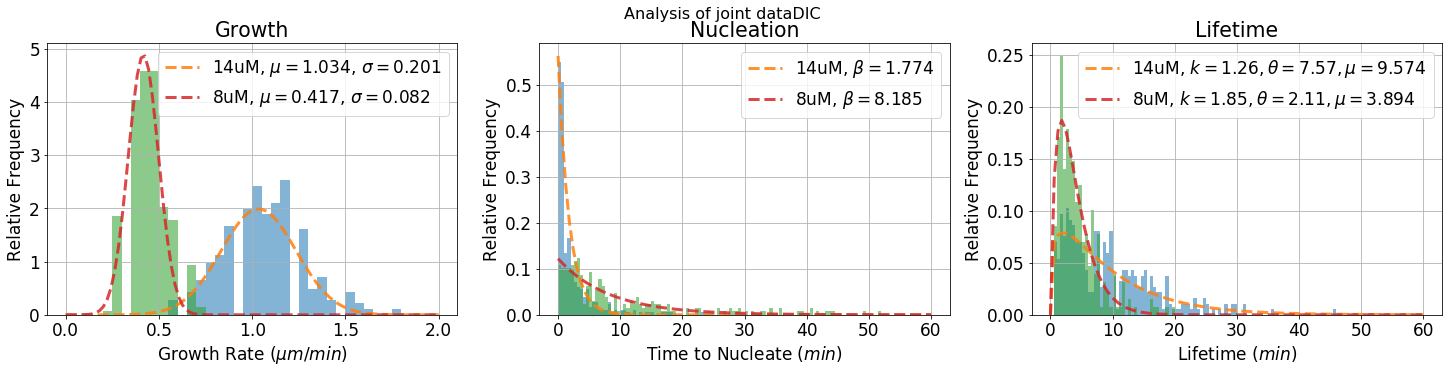

In [43]:
legnd0 = []
legnd1 = []
legnd2 = []

titles = ('Growth','Nucleation','Lifetime','Correlation')
xlables = ('Growth Rate ' r'$(\mu m / min)$','Time to Nucleate ' r'$(min)$','Lifetime ' r'$(min)$','Time to Nucleate ' r'$(min)$')

fig, axs = plt.subplots(1,3,figsize=(25,5))
fig.suptitle('Analysis of joint data'+micscp, fontsize=16)

for i in ['14','8']:#tub_concs:#['6']:#list(data):
    
    datos = dataG[i].dropna()
    mu0 = fitdata.loc[fitdata['[tub]'] == float(i)]['mu']['Value']
    sigma0 = fitdata.loc[fitdata['[tub]'] == float(i)]['sigma']['Value']
    n, bins, patches = axs[0].hist(datos, bins=np.arange(0, 2 + 0.05, 0.05), density=True, alpha=0.55);
    x = np.linspace(0, bins[-1], 100)
    axs[0].plot(x, sp.stats.norm.pdf(x,mu0,sigma0),'--', lw=3, alpha=0.85)
    legnd0 = legnd0 + [i+'uM, '+r'$\mu =$'+ str(round(mu0,3))+r', $\sigma =$'+ str(round(sigma0,3))]
    
    datos = dataN[i].dropna()
    scale0 = fitdata.loc[fitdata['[tub]'] == float(i)]['scale e']['Value']
    n, bins, patches = axs[1].hist(datos, bins=np.arange(0, 60 + 0.5, 0.5), density=True, alpha=0.55);
    x = np.linspace(0, bins[-1], 100)
    axs[1].plot(x, sp.stats.expon.pdf(x,0,scale0),'--', lw=3, alpha=0.85)
    legnd1 = legnd1 + [i+'uM, '+r'$\beta =$'+ str(round(scale0,3))]
    
    datos = dataC[i].dropna()
    shape0 = fitdata.loc[fitdata['[tub]'] == float(i)]['shape']['Value']
    scale0 = fitdata.loc[fitdata['[tub]'] == float(i)]['scale g']['Value']
    n, bins, patches = axs[2].hist(datos, bins=np.arange(0, 60 + 0.5, 0.5), density=True, alpha=0.55);
    x = np.linspace(0, bins[-1], 100)
    axs[2].plot(x, sp.stats.gamma.pdf(x, shape0, 0 , scale0),'--', lw=3, alpha=0.85)
    legnd2 = legnd2 + [i+'uM, '+r'$k =$'+ str(round(shape0,2))+r'$, \theta =$'+ str(round(scale0,3))+r'$, \mu =$'+ str(round(scale0*shape0,3))]

for j in np.arange(len(axs)):
    axs[j].set_ylabel('Relative Frequency')
    axs[j].set_xlabel(xlables[j])
    axs[j].set_title(titles[j]);
    axs[j].grid(True)

axs[0].legend(legnd0,loc='upper right')
axs[1].legend(legnd1,loc='upper right')
axs[2].legend(legnd2,loc='upper right')
plt.savefig(path.parents[0]/('joint_histogramsfit_'+jointdate+'.png'))
plt.savefig(path.parents[0]/('joint_histogramsfit_'+jointdate+'.pdf'))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: Matplotlib

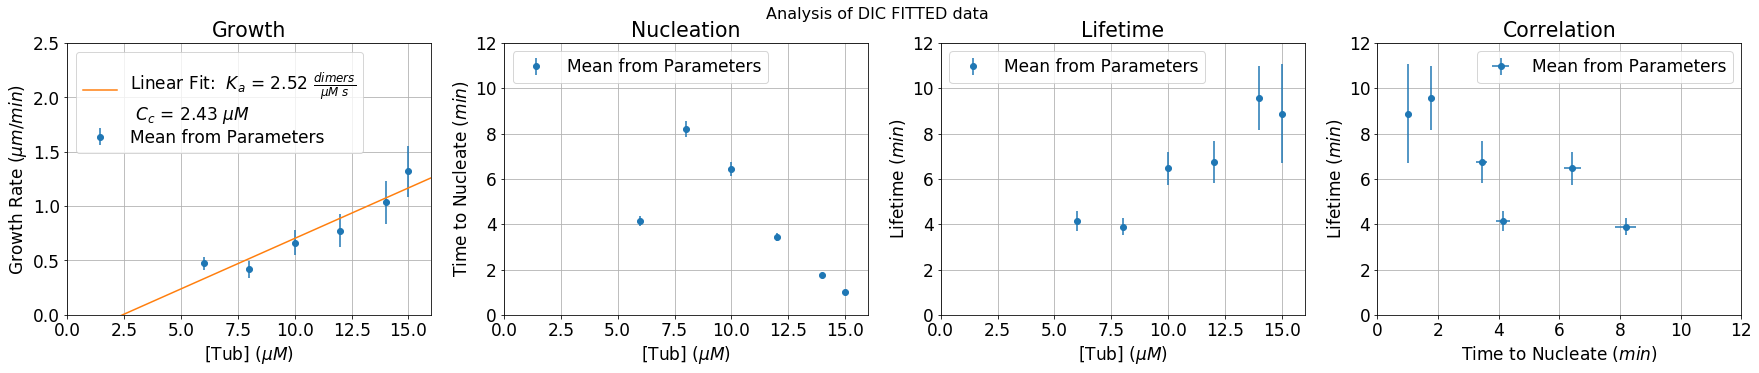

In [39]:
titles = ('Growth','Nucleation','Lifetime','Correlation')
ylables = ('Growth Rate ' r'$(\mu m / min)$','Time to Nucleate ' r'$(min)$','Lifetime ' r'$(min)$','Lifetime ' r'$(min)$')

conc = fitdata['[tub]']['Value'].values
gamma_mu = np.multiply(fitdata['scale g']['Value'].values,fitdata['shape']['Value'].values)
gamma_muSE = np.add(np.multiply(fitdata['scale g']['Value'].values,fitdata['shape']['SE'].values),np.multiply(fitdata['scale g']['SE'].values,fitdata['shape']['Value'].values))

a1 , a0 = np.polyfit(conc, fitdata['mu']['Value'].values, 1)
y_int = -a0/a1
x_range = np.arange(0,17,0.1)
 
plt.figure(figsize=(30,5))
plt.suptitle('Analysis of '+micscp+' FITTED data', fontsize=16)

plt.subplot(1,4,1)
plt.errorbar(conc, fitdata['mu']['Value'].values, yerr=fitdata['sigma']['Value'].values, fmt='o')
plt.plot(x_range, a1*x_range+a0)
plt.ylim(0,2.5)
plt.legend(('Linear Fit:  'r'$K_a$'' = %.2f 'r'$\frac{dimers}{\mu M \; s}$''\n 'r'$C_c$'' = %.2f 'r'$\mu M$' %(a1*27.1, y_int),'Mean from Parameters'),loc='upper left')

plt.subplot(1,4,2)
plt.errorbar(conc, fitdata['scale e']['Value'].values, yerr=fitdata['scale e']['SE'].values, fmt='o')
plt.ylim(0,12)
plt.legend(( 'Mean from Parameters',r'$\sigma$'),loc='upper left')

plt.subplot(1,4,3)
plt.errorbar(conc, gamma_mu, yerr=gamma_muSE, fmt='o')
plt.ylim(0,12)
plt.legend(('Mean from Parameters', r'$\sigma$'),loc='upper left')

plt.subplot(1,4,4)
plt.errorbar( fitdata['scale e']['Value'].values,gamma_mu, yerr=gamma_muSE , xerr=fitdata['scale e']['SE'].values, fmt='o')
plt.ylim(0,12)
plt.legend(('Mean from Parameters', r'$\sigma$'),loc='upper right')


for i in [0,1,2,3] :
    plt.subplot(1,4,i+1)
    plt.xlabel('[Tub] ' r'$(\mu M)$')
    plt.ylabel(ylables[i])
    plt.title(titles[i]);
    plt.xlim(0,16)
    plt.grid(True)

plt.xlabel('Time to Nucleate ' r'$(min)$') 
plt.xlim(0,12)
plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.pdf'))